<a href="https://colab.research.google.com/github/ninicom/dogs_vs_cats/blob/main/B%E1%BA%A3n_sao_c%E1%BB%A7a_DogCatTrain_DangQuyen.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Load bộ dữ liệu

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("salader/dogs-vs-cats")

print("Path to dataset files:", path)

Path to dataset files: /root/.cache/kagglehub/datasets/salader/dogs-vs-cats/versions/1


In [ ]:
import numpy as np
import pandas as pd

import os

train_label = []
train_path = []
for dirname, _, filenames in os.walk('/root/.cache/kagglehub/datasets/salader/dogs-vs-cats/versions/1/train'):
    for filename in filenames:
        train_label.append(os.path.split(dirname)[-1])
        train_path.append(os.path.join(dirname,filename))

test_label = []
test_path = []
for dirname, _, filenames in os.walk('/root/.cache/kagglehub/datasets/salader/dogs-vs-cats/versions/1/test'):
    for filename in filenames:
        test_label.append(os.path.split(dirname)[-1])
        test_path.append(os.path.join(dirname,filename))



In [ ]:
print(len(train_label))
print(len(test_label))

20000
5000


In [ ]:
import pandas as pd

# chuyển từ mảng label và mảng path thành dataframe
train_df = pd.DataFrame(columns=['path','label'])
train_df['path'] = train_path
train_df['label'] = train_label

test_df = pd.DataFrame(columns=['path','label'])
test_df['path'] = test_path
test_df['label'] = test_label

In [ ]:
# from sklearn.model_selection import train_test_split
# # Chia dữ liệu thành train và test
# train_df, test_df = train_test_split(df, train_size=0.8, shuffle=True, random_state=42)

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.vgg16 import preprocess_input

In [ ]:
#Tạo bộ sinh dữ liệu từ thư viện keras
train_generator = ImageDataGenerator(preprocessing_function=preprocess_input, validation_split=0.2)
test_generator = ImageDataGenerator(preprocessing_function=preprocess_input)


In [ ]:
train_images = train_generator.flow_from_dataframe(dataframe=train_df, x_col='path', y_col='label', # Ensure 'label' is the correct column name for your target variable in train_df
                                                   target_size=(224, 224), color_mode='rgb', class_mode='categorical',
                                                   batch_size=32, shuffle=True, seed=42, subset='training')
val_images = train_generator.flow_from_dataframe(dataframe=train_df, x_col='path', y_col='label', # Ensure 'label' is the correct column name for your target variable in train_df
                                                 target_size=(224, 224), color_mode='rgb', class_mode='categorical',
                                                 batch_size=32, shuffle=True, seed=42, subset='validation' )
test_images = test_generator.flow_from_dataframe(dataframe=test_df, x_col='path', y_col='label', # Ensure 'label' is the correct column name for your target variable in test_df
                                                 target_size=(224, 224), color_mode='rgb', class_mode='categorical',
                                                 batch_size=32, shuffle=False )

Found 16000 validated image filenames belonging to 2 classes.
Found 4000 validated image filenames belonging to 2 classes.
Found 5000 validated image filenames belonging to 2 classes.


In [ ]:
import keras
# tạo mô hình VGG16
base_model_VGG16 = keras.applications.VGG16(input_shape=(224, 224, 3), include_top=False, weights='imagenet')
for layer in base_model_VGG16.layers:
    layer.trainable = False
model_VGG16 = keras.Sequential([
    base_model_VGG16,
    # Flatten layer
    keras.layers.Flatten(),
    # Fully connected layer
    keras.layers.Dense(512, activation='relu'),
    # Output layer with 2 units (for 2 classes) and 'softmax' activation
    keras.layers.Dense(2, activation='softmax')
])

In [ ]:
#tạo mô hình MobileNet
base_model_MobileNet = keras.applications.MobileNet(input_shape=(224, 224, 3), include_top=False, weights='imagenet')
model_MobileNet = keras.Sequential([
    base_model_MobileNet,
    # Flatten layer
    keras.layers.Flatten(),
    # Fully connected layer
    keras.layers.Dense(512, activation='relu'),
    # Output layer with 2 units (for 2 classes) and 'softmax' activation
    keras.layers.Dense(2, activation='softmax')
])

In [ ]:
# tạo mô hình Resnet50
base_model_Resnet50 = keras.applications.ResNet50(input_shape=(224, 224, 3), include_top=False, weights='imagenet')
for layer in base_model_Resnet50.layers:
    layer.trainable = False
model_Resnet50 = keras.Sequential([
    base_model_Resnet50,
    # Flatten layer
    keras.layers.Flatten(),
    # Fully connected layer
    keras.layers.Dense(512, activation='relu'),
    # Output layer with 2 units (for 2 classes) and 'softmax' activation
    keras.layers.Dense(2, activation='softmax')
])

In [ ]:
print('model VGG16')
model_VGG16.summary()
print('model MobileNet')
model_MobileNet.summary()
print('model Restnet50')
model_Resnet50.summary()

model VGG16


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)                   │ (None, 7, 7, 512)           │      14,714,688 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 512)                 │      12,845,568 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 2)                   │           1,026 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 27,561,282 (105.14 MB)

 Trainable params: 12,846,594 (49.01 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

model MobileNet


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ mobilenet_1.00_224 (Functional)      │ (None, 7, 7, 1024)          │       3,228,864 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_4 (Flatten)                  │ (None, 50176)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 512)                 │      25,690,624 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 2)                   │           1,026 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 28,920,514 (110.32 MB)

 Trainable params: 28,898,626 (110.24 MB)

 Non-trainable params: 21,888 (85.50 KB)

model Restnet50


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ resnet50 (Functional)                │ (None, 7, 7, 2048)          │      23,587,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_5 (Flatten)                  │ (None, 100352)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 512)                 │      51,380,736 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 2)                   │           1,026 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 74,969,474 (285.99 MB)

 Trainable params: 51,381,762 (196.01 MB)

 Non-trainable params: 23,587,712 (89.98 MB)

In [ ]:
model_VGG16.compile(optimizer='adam', loss='categorical_crossentropy',metrics=['accuracy'])
model_MobileNet.compile(optimizer='adam', loss='categorical_crossentropy',metrics=['accuracy'])
model_Resnet50.compile(optimizer='adam', loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
print('Training VGG16')
history_VGG16 = model_VGG16.fit(train_images,
                    validation_data=val_images,
                    epochs=10)

Training VGG16
Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


500/500 ━━━━━━━━━━━━━━━━━━━━ 104s 177ms/step - accuracy: 0.9364 - loss: 8.1981 - val_accuracy: 0.9503 - val_loss: 0.1192
Epoch 2/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 85s 169ms/step - accuracy: 0.9890 - loss: 0.0288 - val_accuracy: 0.9770 - val_loss: 0.0638
Epoch 3/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 84s 167ms/step - accuracy: 0.9924 - loss: 0.0223 - val_accuracy: 0.9858 - val_loss: 0.0599
Epoch 4/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 84s 168ms/step - accuracy: 0.9956 - loss: 0.0101 - val_accuracy: 0.9847 - val_loss: 0.0822
Epoch 5/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 142s 168ms/step - accuracy: 0.9966 - loss: 0.0079 - val_accuracy: 0.9685 - val_loss: 0.1875
Epoch 6/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 84s 167ms/step - accuracy: 0.9974 - loss: 0.0060 - val_accuracy: 0.9815 - val_loss: 0.0865
Epoch 7/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 148s 179ms/step - accuracy: 0.9958 - loss: 0.0147 - val_accuracy: 0.9703 - val_loss: 0.1090
Epoch 8/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 91s 180ms/step - accuracy: 0.9979 - loss: 0.0055 - 

In [ ]:
print('Training MobileNet')
history_MobileNet = model_MobileNet.fit(train_images,
                    validation_data=val_images,
                    epochs=10)

Training MobileNet
Epoch 1/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 100s 134ms/step - accuracy: 0.9064 - loss: 2.6621 - val_accuracy: 0.9423 - val_loss: 0.1531
Epoch 2/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 63s 125ms/step - accuracy: 0.9819 - loss: 0.0490 - val_accuracy: 0.9617 - val_loss: 0.1067
Epoch 3/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 61s 122ms/step - accuracy: 0.9868 - loss: 0.0368 - val_accuracy: 0.9820 - val_loss: 0.0482
Epoch 4/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 62s 123ms/step - accuracy: 0.9895 - loss: 0.0331 - val_accuracy: 0.9780 - val_loss: 0.0677
Epoch 5/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 82s 124ms/step - accuracy: 0.9831 - loss: 0.0480 - val_accuracy: 0.9298 - val_loss: 0.2180
Epoch 6/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 82s 124ms/step - accuracy: 0.9868 - loss: 0.0364 - val_accuracy: 0.9375 - val_loss: 0.2017
Epoch 7/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 63s 125ms/step - accuracy: 0.9898 - loss: 0.0311 - val_accuracy: 0.9657 - val_loss: 0.0849
Epoch 8/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 82s 125ms/step - accura

In [ ]:
print('Training Resnet50')
history_Resnet50 = model_Resnet50.fit(train_images,
                    validation_data=val_images,
                    epochs=10)

Training Resnet50
Epoch 1/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 80s 135ms/step - accuracy: 0.9584 - loss: 2.4065 - val_accuracy: 0.9743 - val_loss: 0.1211
Epoch 2/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 62s 123ms/step - accuracy: 0.9932 - loss: 0.0244 - val_accuracy: 0.9712 - val_loss: 0.0922
Epoch 3/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 84s 127ms/step - accuracy: 0.9977 - loss: 0.0059 - val_accuracy: 0.9877 - val_loss: 0.0638
Epoch 4/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 63s 126ms/step - accuracy: 0.9995 - loss: 0.0019 - val_accuracy: 0.9812 - val_loss: 0.1204
Epoch 5/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 82s 125ms/step - accuracy: 0.9996 - loss: 0.0017 - val_accuracy: 0.9812 - val_loss: 0.1307
Epoch 6/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 62s 123ms/step - accuracy: 0.9998 - loss: 7.4992e-04 - val_accuracy: 0.9825 - val_loss: 0.1602
Epoch 7/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 64s 126ms/step - accuracy: 0.9946 - loss: 0.0374 - val_accuracy: 0.9895 - val_loss: 0.0886
Epoch 8/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 63s 124ms/step - accu

In [ ]:
# lưu mô hình để tái sử dụng
model_VGG16.save("model_VGG16.keras")
model_MobileNet.save("model_MobileNet.keras")
model_Resnet50.save("model_Resnet50.keras")

In [ ]:
results_VGG16 = model_VGG16.evaluate(test_images, verbose=0)
print('VGG16:')
print("    Test Loss: {:.5f}".format(results_VGG16[0]))
print("    Test Accuracy: {:.2f}%".format(results_VGG16[1] * 100))

results_MobileNet = model_MobileNet.evaluate(test_images, verbose=0)
print('MobileNet:')
print("    Test Loss: {:.5f}".format(results_MobileNet[0]))
print("    Test Accuracy: {:.2f}%".format(results_MobileNet[1] * 100))

results_Resnet50 = model_Resnet50.evaluate(test_images, verbose=0)
print('Resnet50.:')
print("    Test Loss: {:.5f}".format(results_Resnet50[0]))
print("    Test Accuracy: {:.2f}%".format(results_Resnet50[1] * 100))

VGG16:
    Test Loss: 0.15759
    Test Accuracy: 98.12%
MobileNet:
    Test Loss: 0.07664
    Test Accuracy: 96.88%
Resnet50.:
    Test Loss: 0.14604
    Test Accuracy: 98.32%


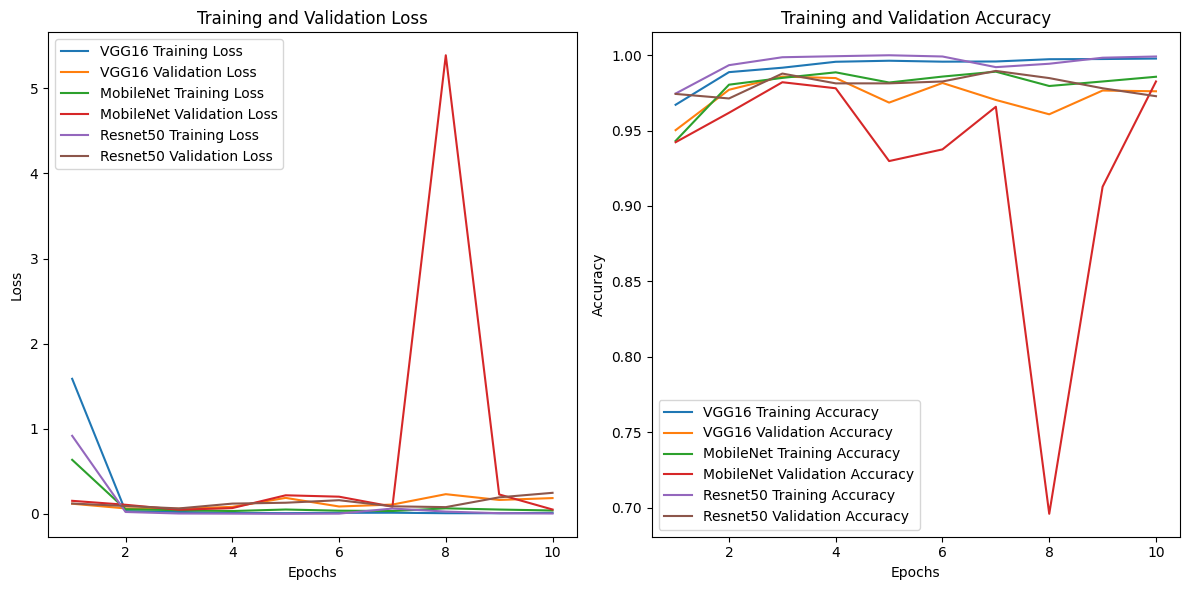

In [ ]:
import matplotlib.pyplot as plt

# Lấy thông tin từ lịch sử huấn luyện
VGG16_train_loss = history_VGG16.history['loss']
VGG16_val_loss = history_VGG16.history['val_loss']
VGG16_train_accuracy = history_VGG16.history['accuracy']
VGG16_val_accuracy = history_VGG16.history['val_accuracy']

MbN_train_loss = history_MobileNet.history['loss']
MbN_val_loss = history_MobileNet.history['val_loss']
MbN_train_accuracy = history_MobileNet.history['accuracy']
MbN_val_accuracy = history_MobileNet.history['val_accuracy']

RN50_train_loss = history_Resnet50.history['loss']
RN50_val_loss = history_Resnet50.history['val_loss']
RN50_train_accuracy = history_Resnet50.history['accuracy']
RN50_val_accuracy = history_Resnet50.history['val_accuracy']

# Vẽ biểu đồ
plt.figure(figsize=(12, 6))

# Biểu đồ loss
plt.subplot(1, 2, 1)

plt.plot(range(1, len(VGG16_train_loss) + 1), VGG16_train_loss, label='VGG16 Training Loss')
plt.plot(range(1, len(VGG16_val_loss) + 1), VGG16_val_loss, label='VGG16 Validation Loss')


plt.plot(range(1, len(MbN_train_loss) + 1), MbN_train_loss, label='MobileNet Training Loss')
plt.plot(range(1, len(MbN_val_loss) + 1), MbN_val_loss, label='MobileNet Validation Loss')


plt.plot(range(1, len(RN50_train_loss) + 1), RN50_train_loss, label='Resnet50 Training Loss')
plt.plot(range(1, len(RN50_val_loss) + 1), RN50_val_loss, label='Resnet50 Validation Loss')

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

# Biểu đồ accuracy
plt.subplot(1, 2, 2)

plt.plot(range(1, len(VGG16_train_accuracy) + 1), VGG16_train_accuracy, label='VGG16 Training Accuracy')
plt.plot(range(1, len(VGG16_val_accuracy) + 1), VGG16_val_accuracy, label='VGG16 Validation Accuracy')

plt.plot(range(1, len(MbN_train_accuracy) + 1), MbN_train_accuracy, label='MobileNet Training Accuracy')
plt.plot(range(1, len(MbN_val_accuracy) + 1), MbN_val_accuracy, label='MobileNet Validation Accuracy')

plt.plot(range(1, len(RN50_train_accuracy) + 1), RN50_train_accuracy, label='Resnet50 Training Accuracy')
plt.plot(range(1, len(RN50_val_accuracy) + 1), RN50_val_accuracy, label='Resnet50 Validation Accuracy')

plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


In [ ]:
import cv2
import matplotlib.pyplot as plt

label_true = []
j=0
for i in test_df['label']:
      label_true.append(i)


def get_pred(modal, test_df):
    '''
    Lấy kết quả dự đoán.

    Parameters:
        - modal: Mô hình dùng để dự đoán
        - test_df: Dataframe cần được dự đoán(chứa đường dẫn ảnh cần dự đoán).

    Returns:
        - label_pred: Mảng các nhãn được dự đoán (gồm hai class là dogs và cats)

    '''
    label_pred=[]
    for i in test_df:
        n_img = cv2.imread(i, cv2.IMREAD_COLOR)
        # Resize the image to a fixed size (50x50 pixels) using linear interpolation
        n_img_size = cv2.resize(n_img, (224, 224))
        image = np.expand_dims(n_img_size, axis=0)
        pred = modal.predict(image)
        pred = np.argmax(pred)
        label_pred.append('cats' if pred == 0 else 'dogs')
    return label_pred

In [ ]:
VGG16_pred = get_pred(model_VGG16, test_df['path'])
MobileNet_pred = get_pred(model_MobileNet, test_df['path'])
Resnet50_pred = get_pred(model_Resnet50, test_df['path'])

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(y_true, y_pred, labels):
    '''
    Hiển thị ma trận nhầm lẫn.

    Parameters:
        - y_true: Mảng numpy chứa nhãn thực tế.
        - y_pred: Mảng numpy chứa nhãn dự đoán.
        - labels: Danh sách các nhãn của các lớp (ví dụ: ['Class 0', 'Class 1']).

    Returns:
        None
    '''
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title('Confusion Matrix')
    plt.show()


class_labels = ['cat', 'dog']


In [ ]:
print('VGG16 confusion matrix')
plot_confusion_matrix(label_true, VGG16_pred, class_labels)

In [ ]:
print('MobileNet confusion matrix')
plot_confusion_matrix(label_true, MobileNet_pred, class_labels)

In [ ]:
print('Resnet50 confusion matrix')
plot_confusion_matrix(label_true, Resnet50_pred, class_labels)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')